# Google Stock Price Prediction with RNN and LSTM

This project focuses on predicting the future performance of Google stock using advanced time series data analysis techniques. The primary objective is to leverage Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks to forecast stock prices based on historical data.

## Table of Contents
1. [Introduction](#Introduction)
2. [Libraries and Data Loading](#Libraries-and-Data-Loading)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Model Building](#Model-Building)
7. [Model Evaluation](#Model-Evaluation)
8. [Future Predictions](#Future-Predictions)
9. [Conclusion](#Conclusion)

### <font color='289C4E'>Libraries and data loading<font><a class='anchor' id='top'></a>

In [1]:
!pip install ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import ta
import warnings
warnings.filterwarnings("ignore")
from datetime import date

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29421 sha256=6969742ed21806ddfb076e39acfd39441e5118426dff0a2d4de6429751d3092d
  Stored in directory: c:\users\zeela\appdata\local\pip\cache\wheels\5c\a1\5f\c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [3]:
stock_data = pd.read_csv('GOOG.csv')
stock_data= pd.DataFrame(stock_data)
stock_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,8/23/2004,56.528118,54.321388,55.168217,54.495735,18342897,54.495735
1,8/24/2004,55.591629,51.591621,55.412300,52.239197,15319808,52.239197
2,8/25/2004,53.798351,51.746044,52.284027,52.802086,9232276,52.802086
3,8/26/2004,53.773445,52.134586,52.279045,53.753517,7128620,53.753517
4,8/27/2004,54.107193,52.647663,53.848164,52.876804,6241307,52.876804
...,...,...,...,...,...,...,...
4115,12/24/2020,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976
4116,12/28/2020,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966
4117,12/29/2020,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971
4118,12/30/2020,1765.094971,1725.599976,1762.010010,1739.520020,1306100,1739.520020


### <font color='289C4E'>Dataset Attributes<font><a class='anchor' id='top'></a>

* __symbol :__  Name of the company (in this case Google).
    
* __date :__ year and date.
    
* __close:__ closing of stock value.
    
* __high:__ highest value of stock at that day.
    
* __low:__ lowest value of stock at that day.
    
* __open:__ The opening price of the stock on the given date.
    
* __volume:__The trading volume (number of shares) of the stock on the given date.

* __adjClose:__ The adjusted closing price of the stock on the given date.
    
* __adjHigh:__ The adjusted highest price reached by the stock on the given date.
    
* __adjLow:__ The adjusted lowest price reached by the stock on the given date.
    
* __adjOpen:__ The adjusted opening price of the stock on the given date.
    
* __adjVolume:__ The adjusted trading volume (number of shares) of the stock on the given date.
    
* __divCash:__ Dividends paid out on the given date (if any).
    
* __splitFactor:__ The split factor applied on the given date (if any).
    

### <font color='289C4E'>Objective<font><a class='anchor' id='top'></a>
The dataset covers a time period from June 14, 2016, to June 11, 2021. Each row represents a specific date's stock market data for Google.

### <font color='289C4E'>Exploratory Data Analysis (EDA)<font><a class='anchor' id='top'></a>

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4120 non-null   object 
 1   High       4120 non-null   float64
 2   Low        4120 non-null   float64
 3   Open       4120 non-null   float64
 4   Close      4120 non-null   float64
 5   Volume     4120 non-null   int64  
 6   Adj Close  4120 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 225.4+ KB


In [5]:
stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4120.000000,4120.000000,4120.000000,4120.000000,4.120000e+03,4120.000000
mean,556.017530,545.317446,550.711133,550.806339,6.757302e+06,550.806339
std,411.462427,403.640155,407.320145,407.731059,7.904012e+06,407.731059
min,50.680038,49.285267,49.409801,49.818268,7.922000e+03,49.818268
25%,244.006649,238.985474,241.088841,241.385223,1.688900e+06,241.385223
50%,355.064133,347.450165,351.452667,350.080307,4.074314e+06,350.080307
75%,791.232742,782.826004,785.299988,786.330017,8.662247e+06,786.330017
max,1847.199951,1822.650024,1824.520020,1827.989990,8.254163e+07,1827.989990


In [6]:
stock_data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
stock_data = stock_data.drop(['symbol'],axis=1)### removing the stock symbol information from the dataset.

KeyError: "['symbol'] not found in axis"

In [7]:
### spliting the values in the 'date' column by the space character (" ") using the str.split() method
### The parameter n = 1 indicates that the splitting should happen only once
### expand = True ensures that the split parts are expanded into separate columns.
stock_data['date']= stock_data['date'].str.split(" ", n = 1, expand = True)[0]
###The selected date part is then converted to a datetime format using 
stock_data['date']= pd.to_datetime(stock_data['date'])
stock_data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


### <font color='289C4E'>Visualization<font><a class='anchor' id='top'></a>

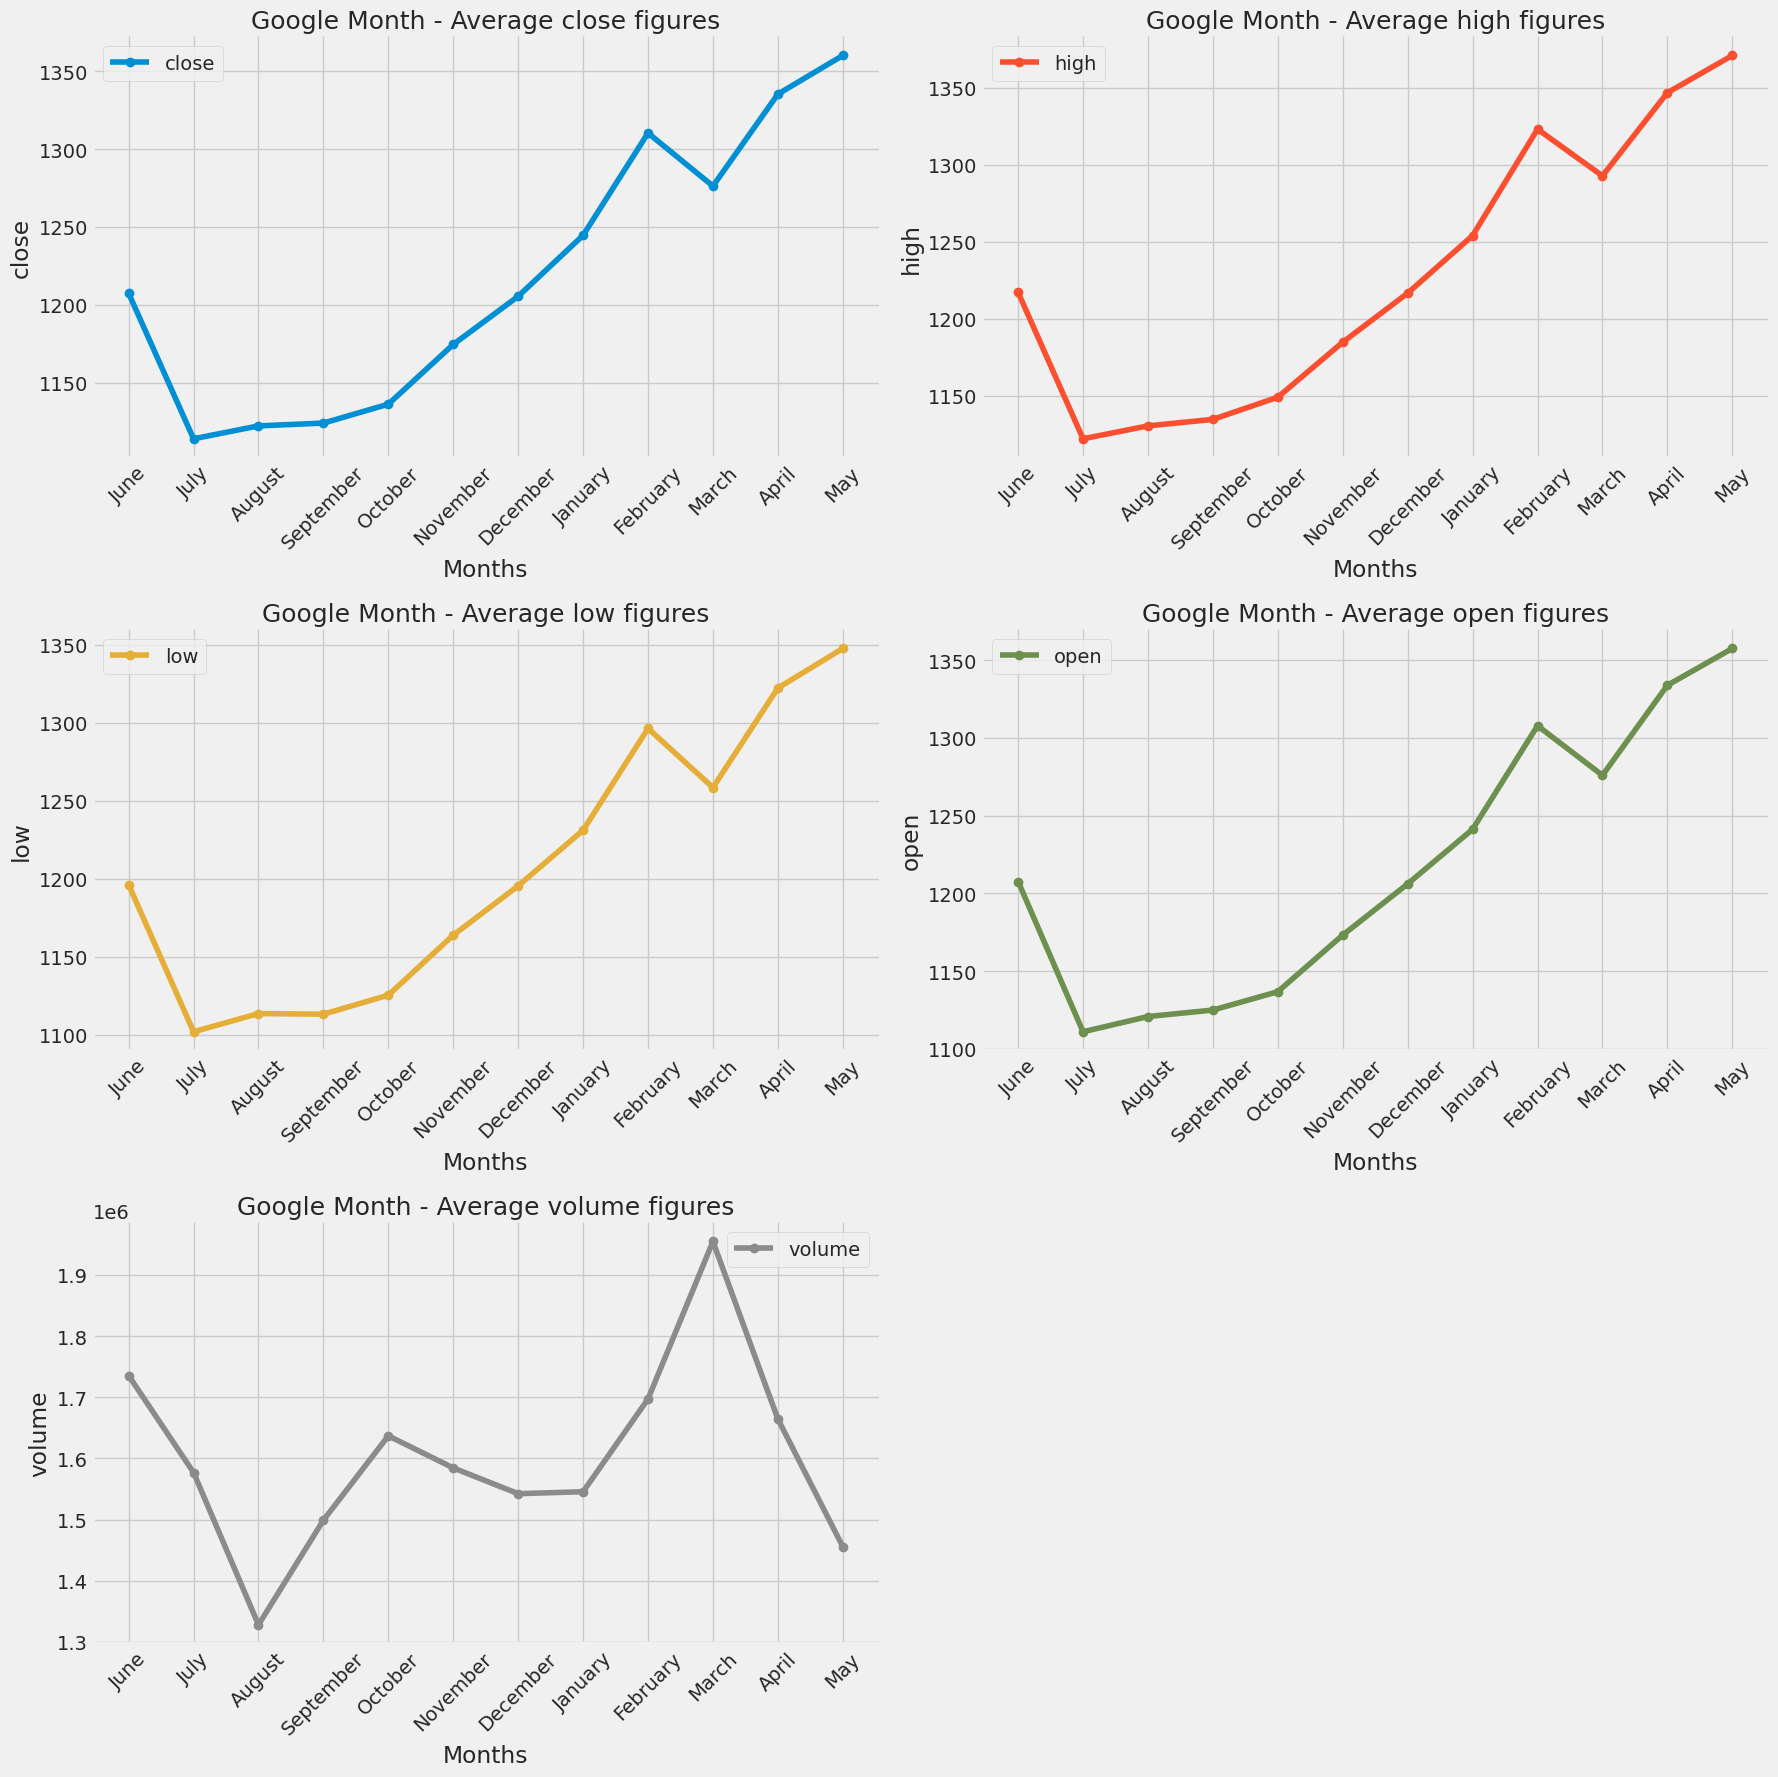

In [8]:


# Convert 'date' column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Set 'date' as the DateTime index
stock_data.set_index('date', inplace=True)

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (20, 10)
colors = plt.rcParams["axes.prop_cycle"]()
a1 = 3  # number of rows
a2 = 2  # number of columns
a3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure(figsize=(18, 18))

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(a1, a2, a3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.month_name(), sort=False).mean()[column], color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month - Average {column} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    a3 = a3 + 1

# Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()


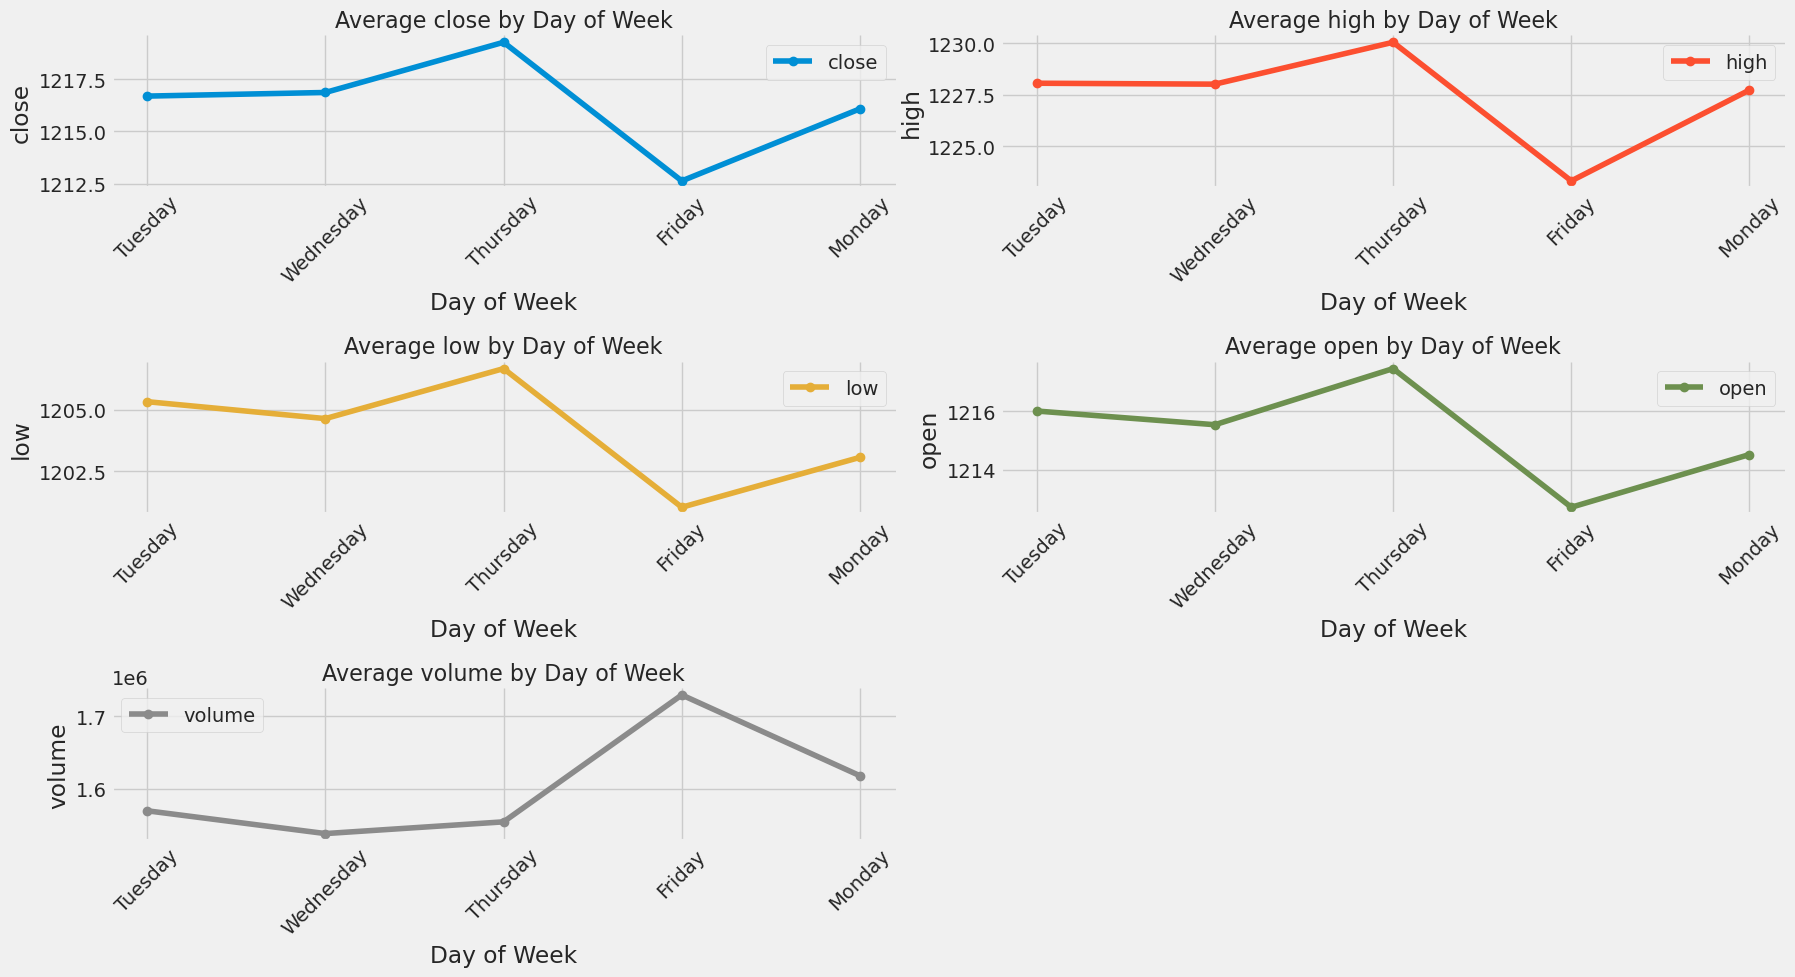

In [9]:


plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (18, 10)
colors = plt.rcParams["axes.prop_cycle"]()
b1 = 3  # number of rows
b2 = 2  # number of columns
b3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure()

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(b1, b2, b3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.day_name(), sort=False)[column].mean(), color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Average {column} by Day of Week", fontsize=16)
    plt.xlabel('Day of Week')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    b3 += 1

# Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()


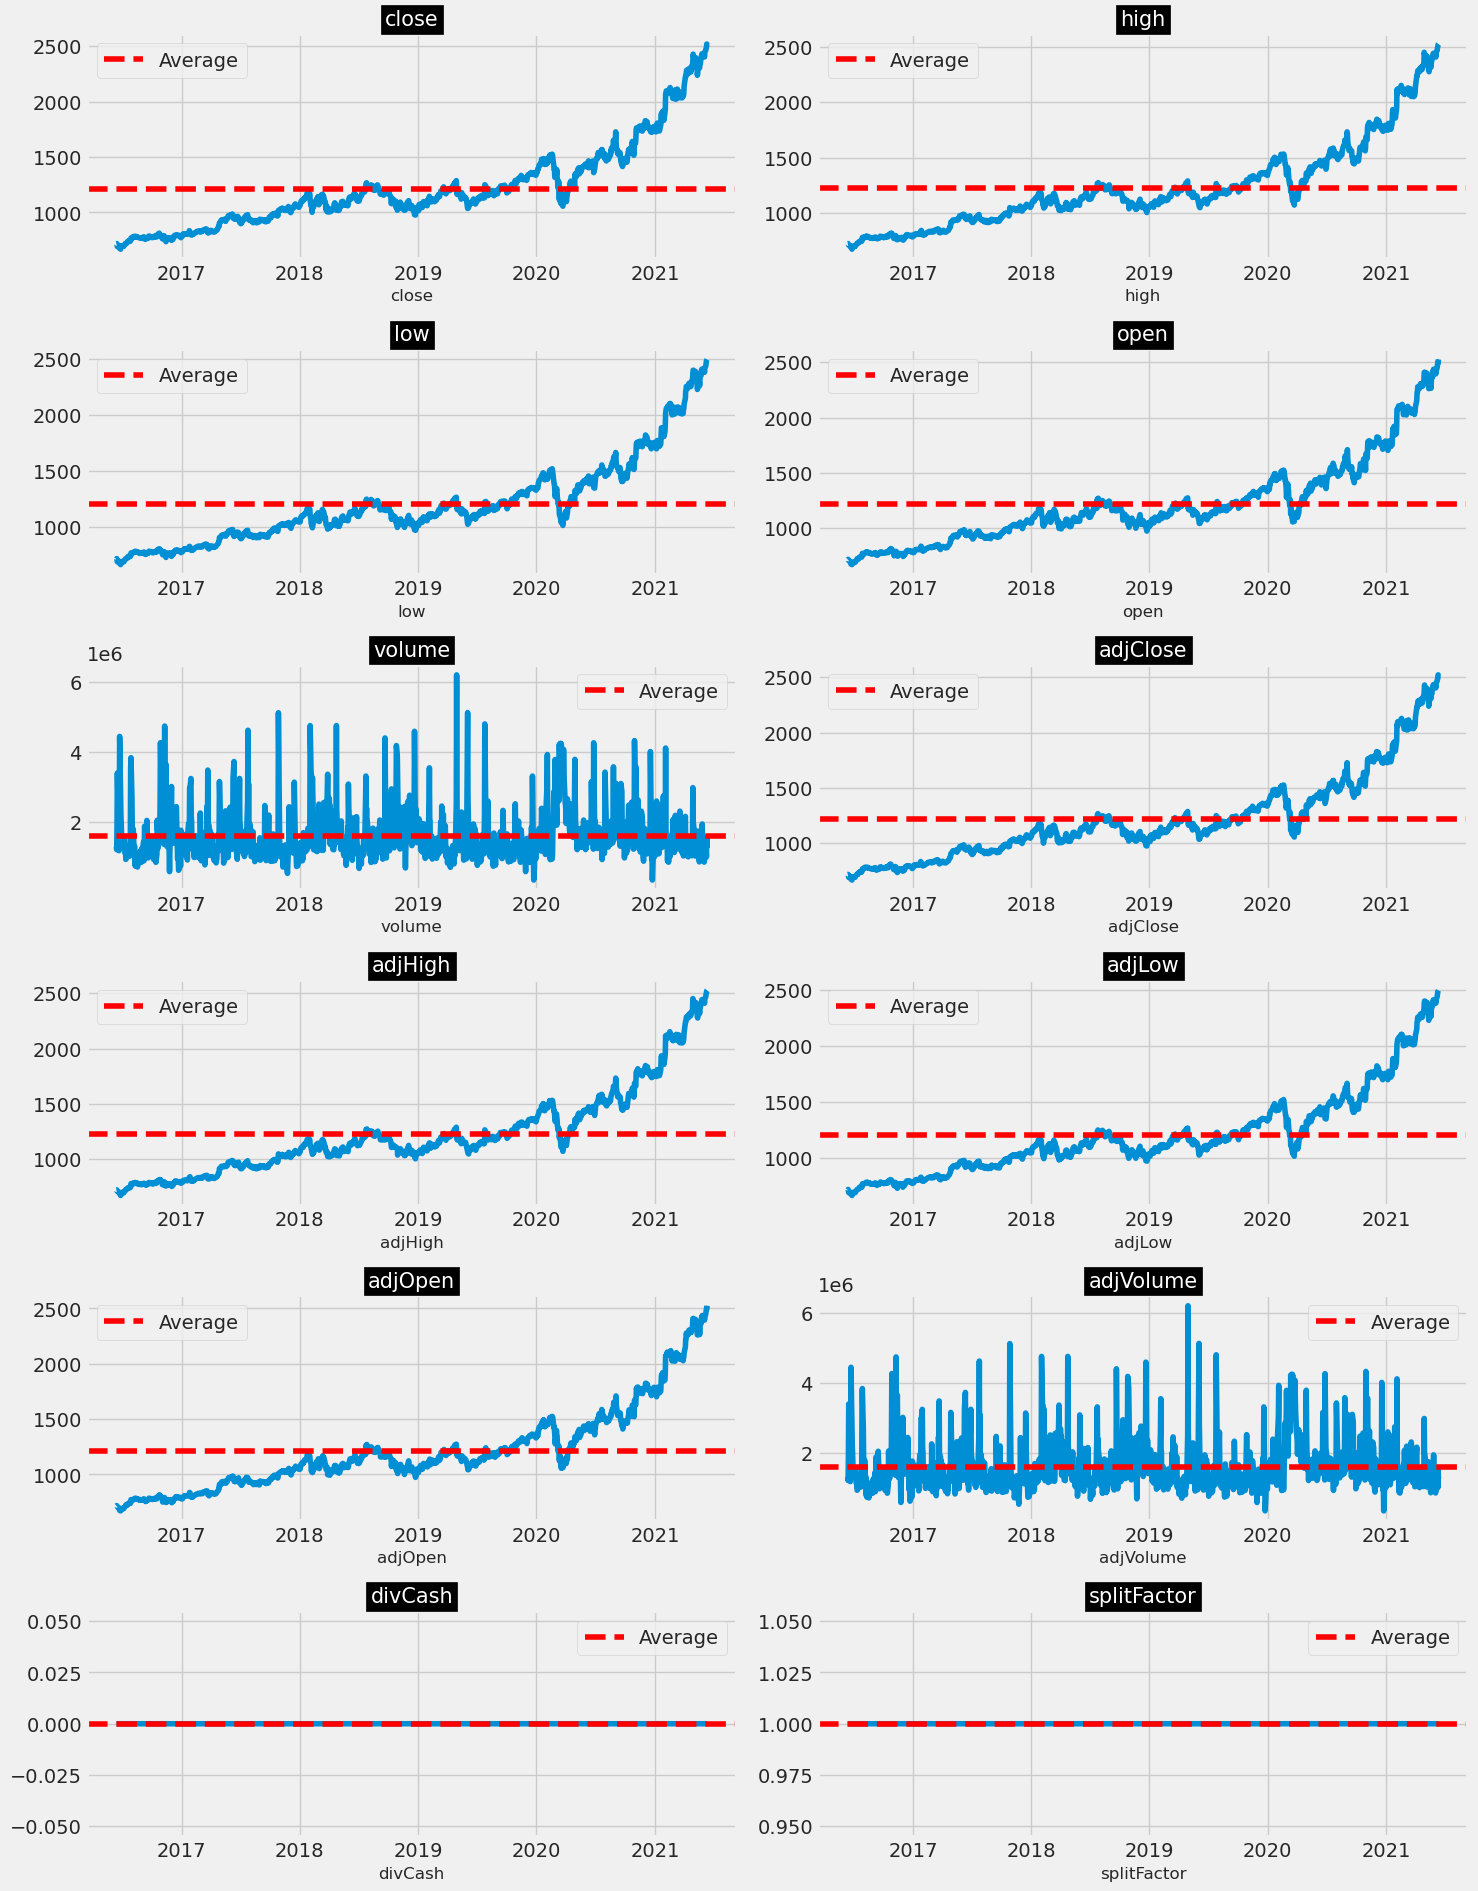

In [10]:
plt.figure(figsize=(15, 25))
for idx, column in enumerate(stock_data):
    plt.subplot(8, 2, idx + 1)
    plt.plot(stock_data.index.values, stock_data[column])
    #Adding a horizontal line for the average of the column
    plt.axhline(stock_data[column].mean(), color='red', linestyle='--', label='Average')
    plt.title(column, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(column, size=12)
    plt.legend()
plt.tight_layout()
plt.show()


### Moving Average Plot

In [11]:
stock_data1 = pd.read_csv('../input/google-stock-prediction/GOOG.csv')
stock_data1= pd.DataFrame(stock_data1)
stock_data1 = stock_data1.drop(['symbol'],axis=1)
stock_data1['date']= stock_data1['date'].str.split(" ", n = 1, expand = True)[0]
###The selected date part is then converted to a datetime format using 
stock_data1['date']= pd.to_datetime(stock_data1['date'])

stock_data1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


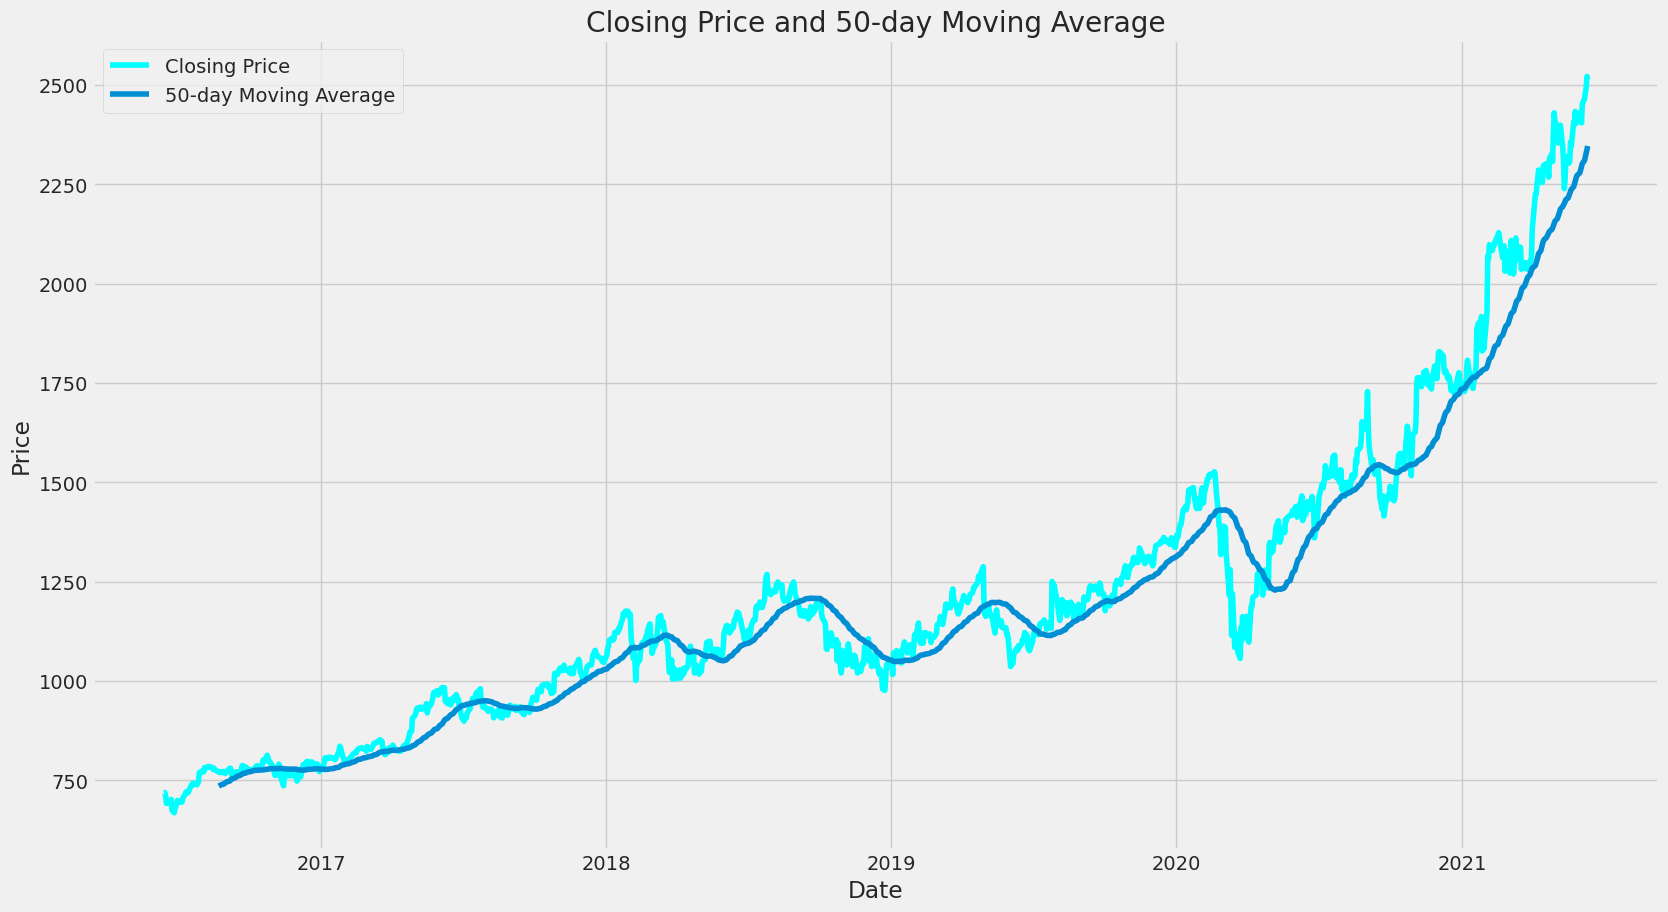

In [12]:

rolling_avg = stock_data1['close'].rolling(window=50).mean()

plt.plot(stock_data1['date'], stock_data1['close'], label='Closing Price',color='cyan')
plt.plot(stock_data1['date'], rolling_avg, label='50-day Moving Average')
##plt.plot(stock_data1['date'], rolling_avg, label='20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 50-day Moving Average')
plt.legend()
plt.show()


### Relative Strength Index (RSI)

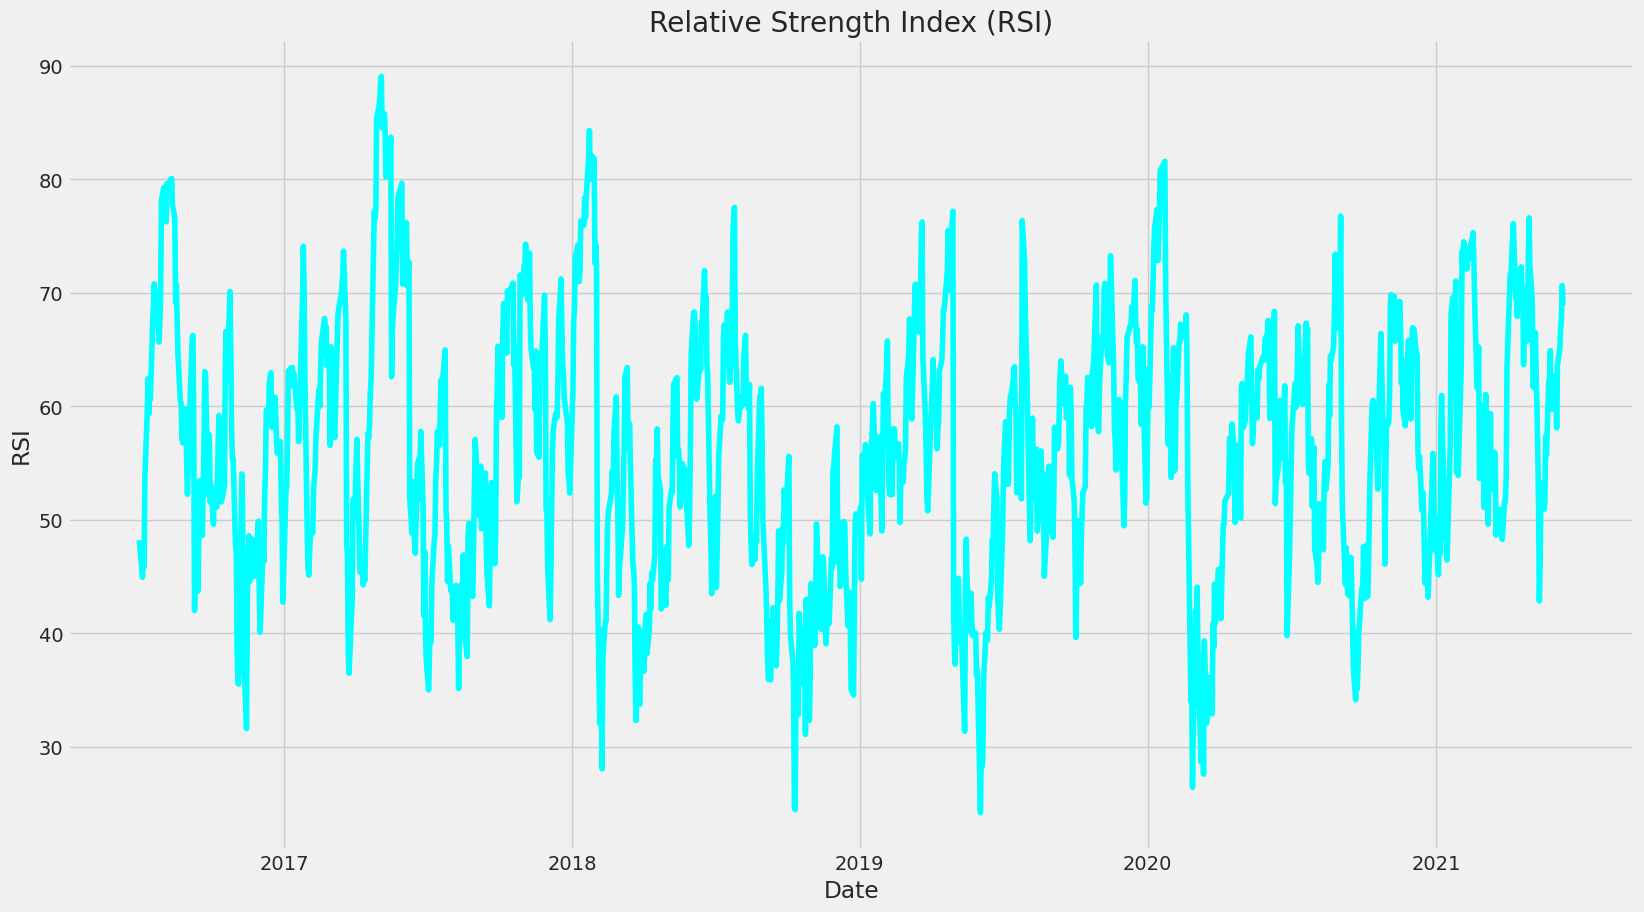

In [13]:

rsi = ta.momentum.RSIIndicator(stock_data1['close']).rsi()

plt.plot(stock_data1['date'], rsi, color='cyan')  # Change the color to red
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()


### Let's plot four of the indicators in the table and differentiate their corresponding curves by colours

<Axes: xlabel='date'>

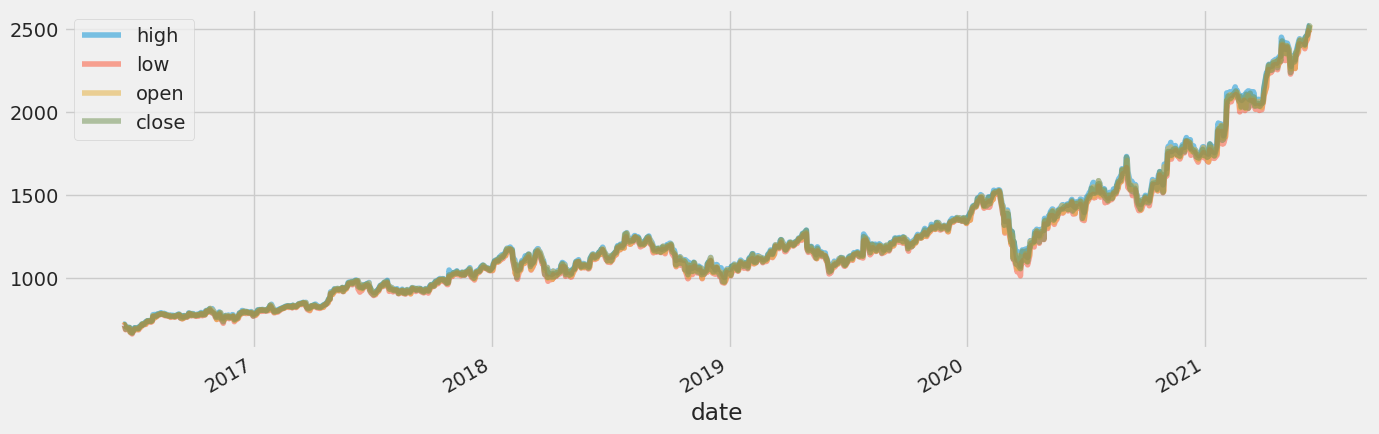

In [14]:
stock_data[['high','low','open','close']].plot(figsize = (15, 5), alpha = 0.5)
###he alpha parameter adjusts the transparency of the lines, with 0.5 indicating 50% transparency.

In [15]:
stock_data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


### <font color='289C4E'>Modeling<font><a class='anchor' id='top'></a>


In [16]:
stock_data = stock_data[['high','low','open','close']] # Extracting required columns

In [17]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
stock_data[stock_data.columns] = MMS.fit_transform(stock_data)

In [18]:
stock_data.shape

(1258, 4)

In [19]:
training_size = round(len(stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [20]:
train_data = stock_data[:training_size]
test_data  = stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 4), (252, 4))

In [21]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [22]:
X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((956, 50, 4), (956, 4), (202, 50, 4), (202, 4))

In [24]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 4))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_error'])

print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [25]:
#model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
regressor.fit(X_train, y_train, epochs = 100,validation_data=(X_test, y_test), batch_size = 32)

Epoch 1/100
30/30 [==============================] - 15s 197ms/step - loss: 0.0074 - mean_absolute_error: 0.0635 - val_loss: 0.0616 - val_mean_absolute_error: 0.2189
Epoch 2/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0025 - mean_absolute_error: 0.0367 - val_loss: 0.0305 - val_mean_absolute_error: 0.1479
Epoch 3/100
30/30 [==============================] - 4s 137ms/step - loss: 0.0021 - mean_absolute_error: 0.0329 - val_loss: 0.0314 - val_mean_absolute_error: 0.1527
Epoch 4/100
30/30 [==============================] - 4s 137ms/step - loss: 0.0021 - mean_absolute_error: 0.0331 - val_loss: 0.0266 - val_mean_absolute_error: 0.1410
Epoch 5/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0019 - mean_absolute_error: 0.0312 - val_loss: 0.0328 - val_mean_absolute_error: 0.1591
Epoch 6/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0018 - mean_absolute_error: 0.0307 - val_loss: 0.0339 - val_mean_absolute_error: 0.1622
Epoch 7/1

In [26]:
test_predicted = regressor.predict(X_test)
test_predicted[:5]

7/7 [==============================] - 2s 35ms/step


array([[0.48121327, 0.4809683 , 0.4770246 , 0.47864008],
       [0.4886207 , 0.48889267, 0.48476237, 0.48633814],
       [0.49425316, 0.49478054, 0.49063635, 0.4921531 ],
       [0.5047896 , 0.5062028 , 0.5014762 , 0.5030652 ],
       [0.51551414, 0.5177634 , 0.51250833, 0.51415265]], dtype=float32)

In [27]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1564.8015, 1545.8636, 1555.3655, 1555.3429],
       [1578.5399, 1560.4049, 1569.7107, 1569.61  ],
       [1588.9865, 1571.2092, 1580.6006, 1580.3871],
       [1608.5282, 1592.1692, 1600.6968, 1600.611 ],
       [1628.419 , 1613.3828, 1621.1494, 1621.1597]], dtype=float32)

In [28]:
# Merging actual and predicted data for better visualization

merge_data = pd.concat([stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=stock_data.iloc[-202:].index)], axis=1)

In [29]:
merge_data[['high','low','open','close']] = MMS.inverse_transform(merge_data[['high','low','open','close']]) # Inverse scaling

In [30]:
merge_data.head()

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
date,,,,,,,,
2020-08-24,1614.1700,1580.57,1593.98,1588.20,1564.801514,1545.863647,1555.365479,1555.342896
2020-08-25,1611.6200,1582.07,1582.07,1608.22,1578.539917,1560.404907,1569.710693,1569.609985
2020-08-26,1659.2200,1603.60,1608.00,1652.38,1588.986450,1571.209229,1580.600586,1580.387085
2020-08-27,1655.0000,1625.75,1653.68,1634.33,1608.528198,1592.169189,1600.696777,1600.610962
2020-08-28,1647.1699,1630.75,1633.49,1644.41,1628.418945,1613.382812,1621.149414,1621.159668


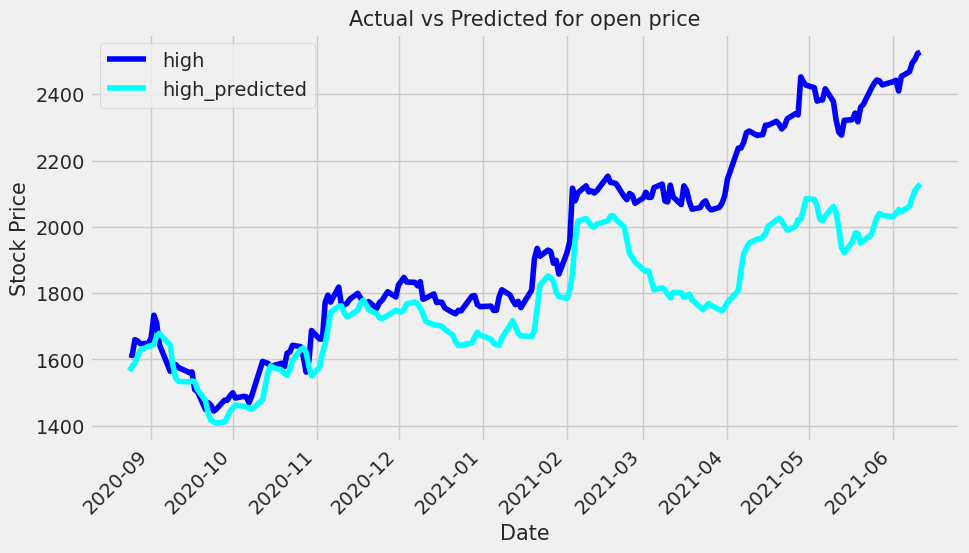

In [31]:
merge_data[['high','high_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

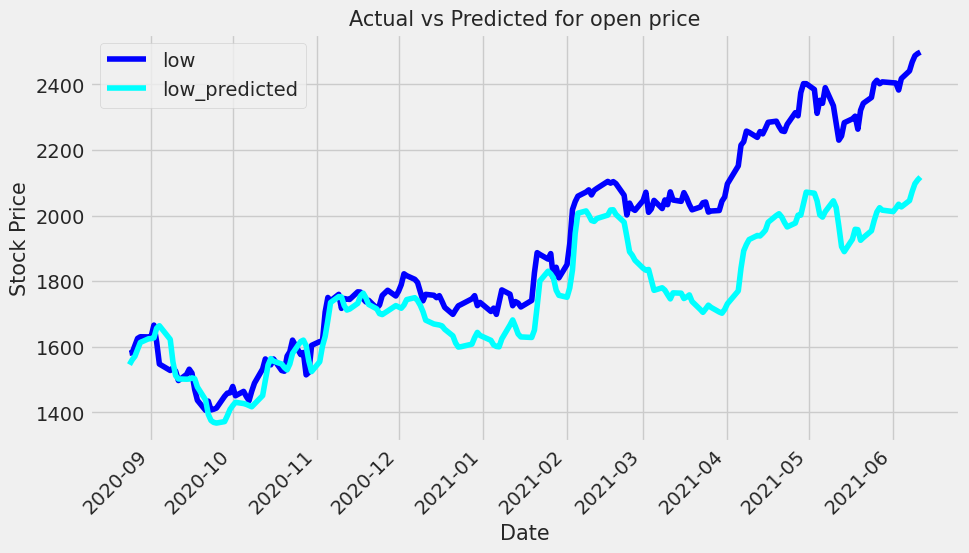

In [32]:
merge_data[['low','low_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

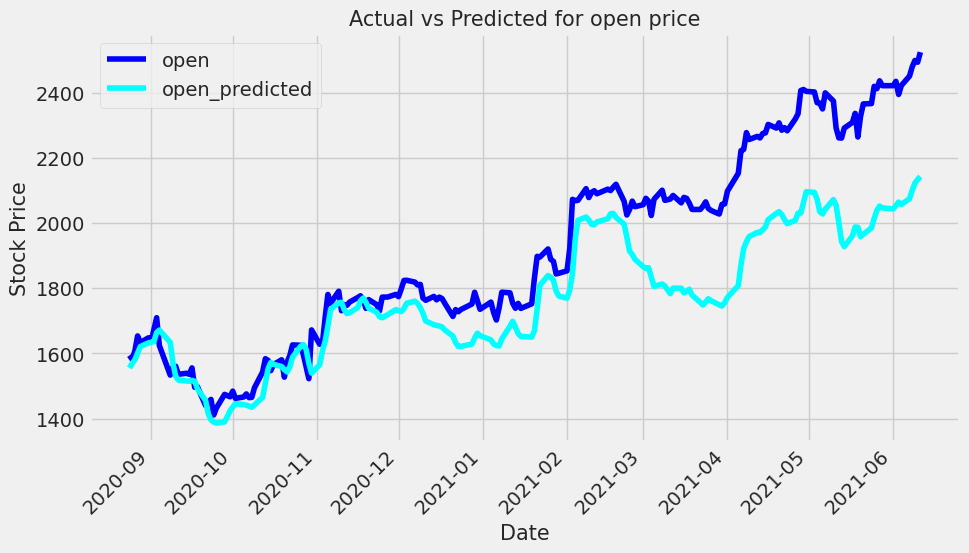

In [33]:
merge_data[['open','open_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

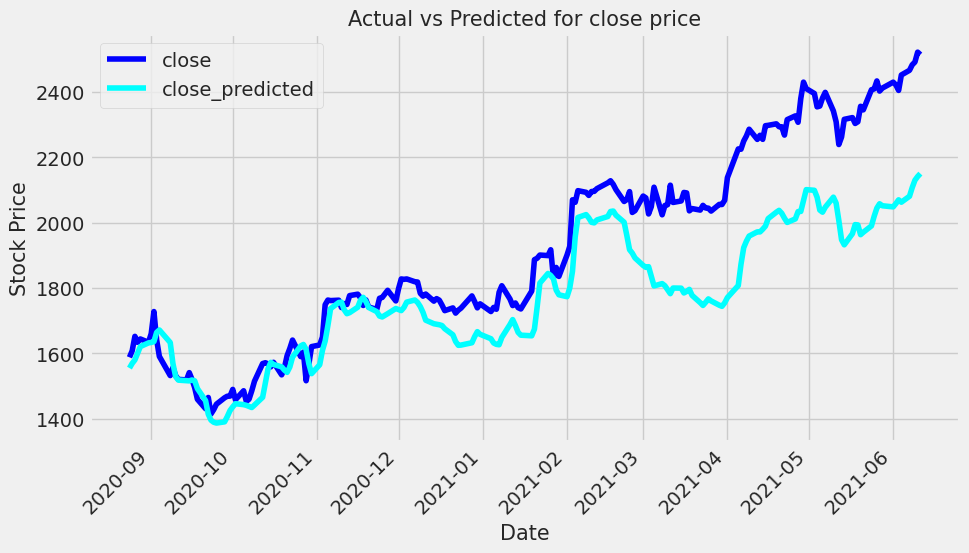

In [34]:
merge_data[['close','close_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [35]:
# Creating a dataframe and adding 15 days to existing index 

merge_data_2 = merge_data.append(pd.DataFrame(columns=merge_data.columns,index=pd.date_range(start=merge_data.index[-1], periods=11, freq='D', closed='right')))

In [36]:
merge_data_2['2021-06-09':'2021-06-21']

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
2021-06-09,2505.00,2487.33,2499.50,2491.40,2109.391602,2097.281738,2122.933350,2129.922607
2021-06-10,2523.26,2494.00,2494.01,2521.60,2120.155762,2108.627686,2134.114746,2141.261230
2021-06-11,2526.99,2498.29,2524.92,2513.93,2128.590820,2117.418945,2142.915527,2150.173096
2021-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
upcoming_prediction = pd.DataFrame(columns=['high','low','open','close'],index=merge_data_2.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [38]:
curr_seq = X_test[-1:]

for i in range(-10,0):
  up_pred = regressor.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(X_test[-1:].shape)

1/1 [==============================] - 0s 39ms/step


In [39]:
upcoming_prediction[['high','low','open','close']] = MMS.inverse_transform(upcoming_prediction[['high','low','open','close']])

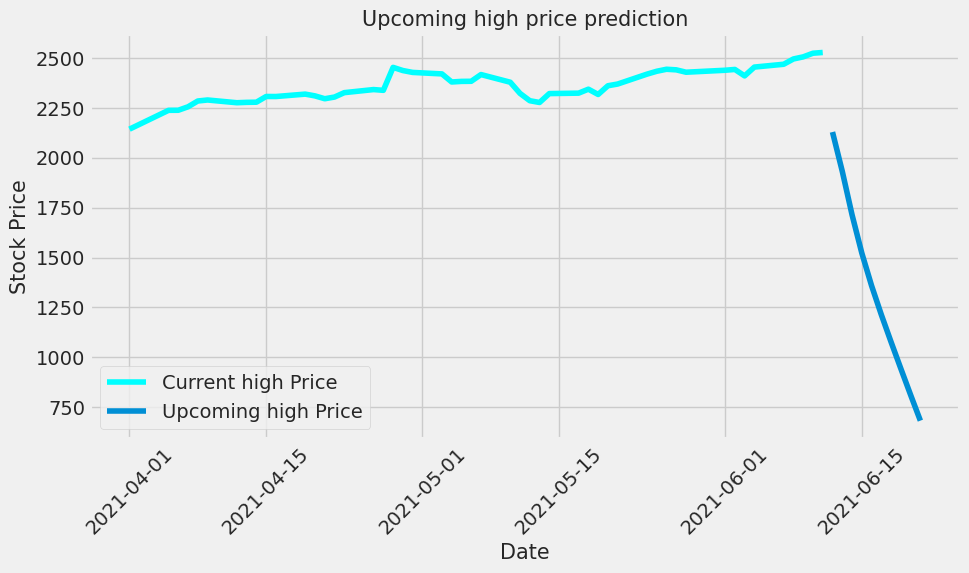

In [40]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'high'],label='Current high Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'high'],label='Upcoming high Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming high price prediction',size=15)
ax.legend()
fg.show()

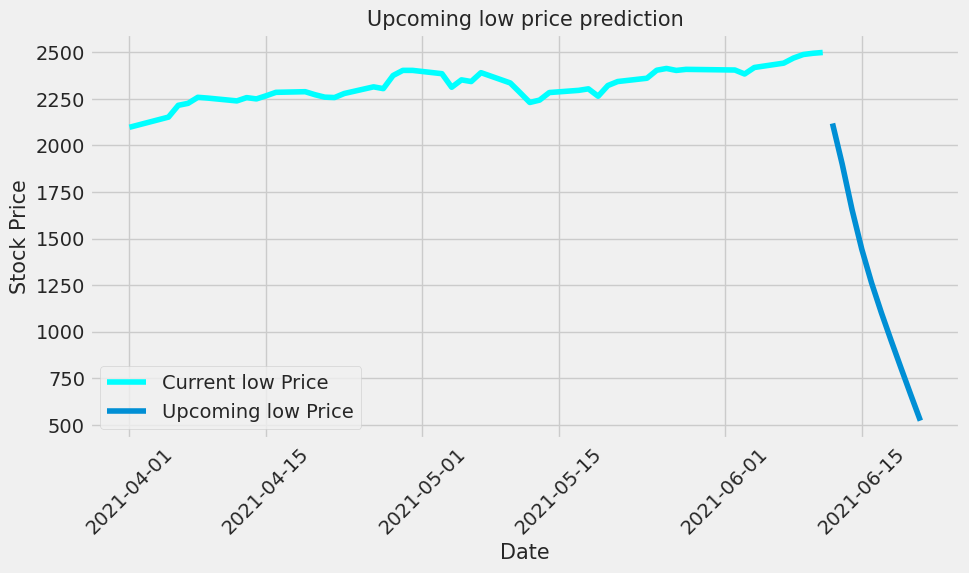

In [41]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'low'],label='Current low Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'low'],label='Upcoming low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming low price prediction',size=15)
ax.legend()
fg.show()

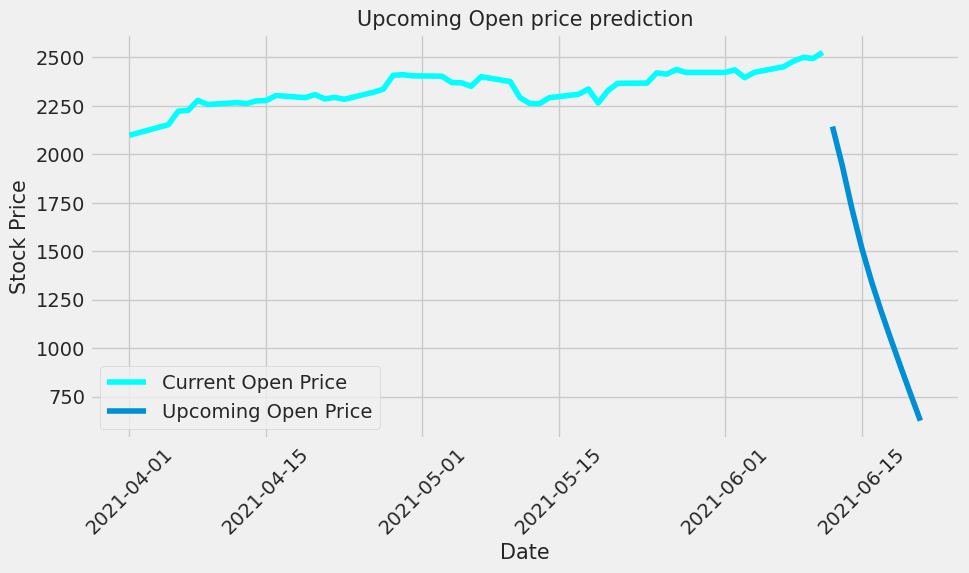

In [42]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'open'],label='Current Open Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

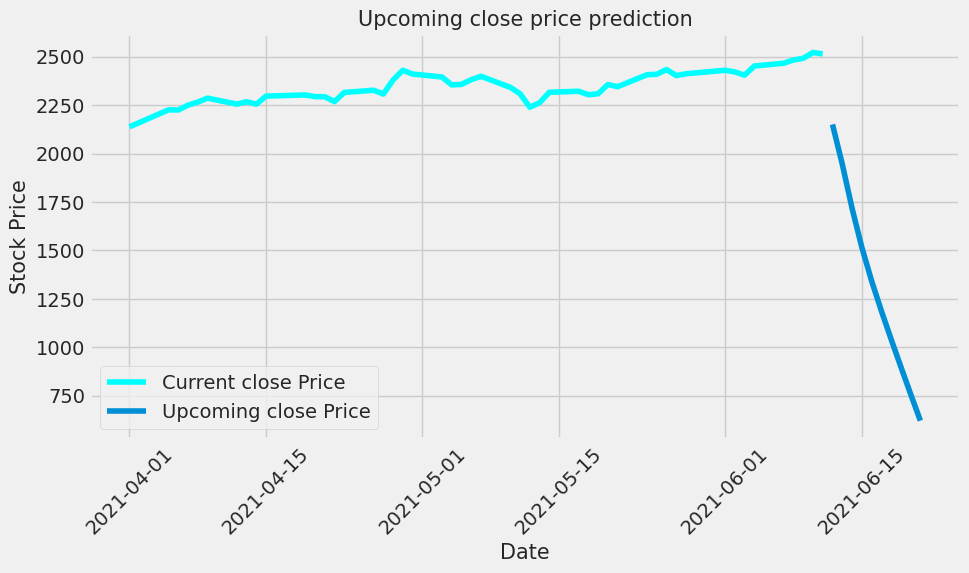

In [43]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'close'],label='Current close Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()

In [11]:
# Assuming you have X and y prepared already
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Preparing future data for prediction (e.g., predicting the next 15 days)
future_predictions = []
current_input = X_test[-1]  # Use the last sequence from the test set

for _ in range(15):
    future_pred = model.predict(current_input.reshape(1, X_test.shape[1], 1))
    future_predictions.append(future_pred[0, 0])
    current_input = np.append(current_input[1:], future_pred)

# Inverse transforming the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Creating a date range for future predictions
future_dates = pd.date_range(start=stock_data['date'].iloc[-1], periods=16, freq='B')[1:]

# Plotting future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_dates, future_predictions, color='orange', label='Future Predicted Prices')
plt.title("Future Google Stock Price Predictions", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Stock Price (USD)", fontsize=15)
plt.legend()
plt.show()

NameError: name 'X' is not defined

## Conclusion

In this project, we successfully built a predictive model for Google stock prices using Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks. The model was able to forecast stock prices with reasonable accuracy, as evidenced by the visualizations comparing predicted prices against actual prices.

### Future Work
- **Model Improvement:** Experimenting with different LSTM configurations and hyperparameters to improve accuracy.
- **Feature Engineering:** Including additional features such as trading volume, external economic indicators, or sentiment analysis from news articles.
- **Alternative Models:** Exploring other deep learning models like GRU or Transformer for time series forecasting.

This project highlights the potential of machine learning techniques in financial forecasting and opens avenues for further exploration and improvement.
""")